# Regression Analysis and Clustering Models


**For this project I will experiment with various regression approaches and I'll get my feet wet with some clustering. I will rely on subsets of some real-world data sets and on tools from the Scikit-learn machine learning package for Python as well as modules from the textbook code (Machine Learning in Action, Chapters 8 and 10).**

### 1) Linear Regression
**a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression. Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.**

In [982]:
import numpy as np
import pandas as pd

**- Load data from communities.csv, the provided file**

In [983]:
community = pd.read_csv("communities.csv", usecols=(range(2,100)), na_values=['?'])
print(community.shape)
community.head()

(1994, 98)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


**Note: Data appears to be in the normalized form as above.**

**- Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set.**

In [984]:
community.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.63,0.85,0.94,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.04,0.07,0.17,1.0
...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,0.651530,0.198221,0.0,0.56,0.70,0.79,1.0
LandArea,1994.0,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,0.232854,0.203092,0.0,0.10,0.17,0.28,1.0
PctUsePubTrans,1994.0,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0


**- Separate the target attribute for regression. Create a 20%-80% randomized split of the data.**

**- The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.**

In [985]:
community_names = community.columns.values
print(community_names)

['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian' 'racePctHisp' 'agePct12t21' 'agePct12t29'
 'agePct16t24' 'agePct65up' 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc' 'pctWSocSec'
 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc' 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap'
 'OtherPerCap' 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade' 'PctNotHSGrad' 'PctBSorMore'
 'PctUnemployed' 'PctEmploy' 'PctEmplManu' 'PctEmplProfServ' 'MalePctDivorce' 'MalePctNevMarr' 'FemalePctDiv'
 'TotalPctDiv' 'PersPerFam' 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMomYoungKids'
 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig' 'PctImmigRecent' 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10'
 'PctRecentImmig' 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10' 'PctSpeakEnglOnly' 'PctNotSpeakEnglWell'
 'PctLargHouseFam' 'PctLargHouseOccup' 'PersPerOccupHous' 'PersPerOwnOccHous' 'PersPerRentOccHous' 'PctPersOwnOccup'
 

**There are no "state" and "community name" on the column**

In [986]:
target = community[['ViolentCrimesPerPop']] # y
train = community.iloc[:,0:97] # x

**Data Preprocessing**

In [987]:
# get a list of columns with missing values
missingValue = community.isnull().sum(0)>0
missingValue[missingValue==1].index

Index(['OtherPerCap'], dtype='object')

In [988]:
# compute mean for missing value
OtherPerCap_Mean = community.OtherPerCap.mean()
community.OtherPerCap.fillna(OtherPerCap_Mean, inplace=True, axis=0)
print("Mean:",OtherPerCap_Mean)

Mean: 0.28474159558454626


In [989]:
community[['OtherPerCap']].iloc[130:140]

,OtherPerCap
130,0.284742
131,0.000000
132,0.200000
133,0.410000
134,0.390000
135,0.450000
136,0.000000
137,0.410000
138,0.880000
139,0.710000


**Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set.**

In [990]:
print(community.describe(include="all").T)

                      count      mean       std  min   25%   50%   75%  max
population           1994.0  0.057593  0.126906  0.0  0.01  0.02  0.05  1.0
householdsize        1994.0  0.463395  0.163717  0.0  0.35  0.44  0.54  1.0
racepctblack         1994.0  0.179629  0.253442  0.0  0.02  0.06  0.23  1.0
racePctWhite         1994.0  0.753716  0.244039  0.0  0.63  0.85  0.94  1.0
racePctAsian         1994.0  0.153681  0.208877  0.0  0.04  0.07  0.17  1.0
...                     ...       ...       ...  ...   ...   ...   ...  ...
PctSameState85       1994.0  0.651530  0.198221  0.0  0.56  0.70  0.79  1.0
LandArea             1994.0  0.065231  0.109459  0.0  0.02  0.04  0.07  1.0
PopDens              1994.0  0.232854  0.203092  0.0  0.10  0.17  0.28  1.0
PctUsePubTrans       1994.0  0.161685  0.229055  0.0  0.02  0.07  0.19  1.0
ViolentCrimesPerPop  1994.0  0.237979  0.232985  0.0  0.07  0.15  0.33  1.0

[98 rows x 8 columns]


In [991]:
# build the train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=99)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [992]:
print(train.shape, target.shape)

(1994, 97) (1994, 1)


In [993]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1595, 97) (399, 97) (1595,) (399,)


**b) Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). Compute the RMSE value on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).**

In [994]:
# adding a column of 1s
trainNP = np.array(x_train)
x = np.array([np.concatenate((v,[1])) for v in trainNP])
y = np.array(y_train)

In [995]:
print(x.shape, y.shape)

(1595, 98) (1595,)


**Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation)**

In [996]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [997]:
w = standRegres(x,y)
print(w.T)

[[ 0.2102 -0.062   0.2325 -0.1667 -0.0313  0.0204  0.149  -0.1382 -0.211  -0.0084 -0.2567  0.0463 -0.1653 -0.1699
   0.0533 -0.1336  0.1915 -0.0535 -0.0945  0.3715  0.446  -0.6972 -0.035  -0.0504 -0.013   0.0305  0.0307  0.1987
  -0.1938 -0.0929  0.082   0.0794  0.0248  0.2507 -0.0495 -0.015   0.349   0.2051  0.0841 -0.3393 -0.232  -0.0644
  -0.2338 -0.031   0.0416  0.0592 -0.2101 -0.1803  0.1151 -0.1738  0.013   0.0551 -0.0716  0.0082 -0.0271 -0.1926
   0.5062 -0.3255  0.0201 -0.0759  0.1552 -0.3068  0.6293 -0.0138 -0.193  -0.685   0.2475  0.1473  0.0464  0.1014
  -0.0448  0.575   0.0284 -0.0753 -0.0543  0.0171 -0.0123 -0.1065 -0.1425  0.1796 -0.2374 -0.0514 -0.0313  0.3498
   0.052  -0.0563 -0.088   0.2761  0.0805  0.1341 -0.0043 -0.0527  0.0111  0.046  -0.0063 -0.0456 -0.0288  0.5406]]


**Compute the RMSE value on the full training data (the 80% partition)**

In [998]:
# Compute RMSE on training data
yHat = x*w 
yHatT = yHat.T

err = abs(yHatT - y)
total_error = np.dot(err,err.T)

rmse_train = np.sqrt(total_error/len(yHat))
print("RMSE on Training Data: ", rmse_train) 

RMSE on Training Data:  [[0.1294]]


**Plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib**

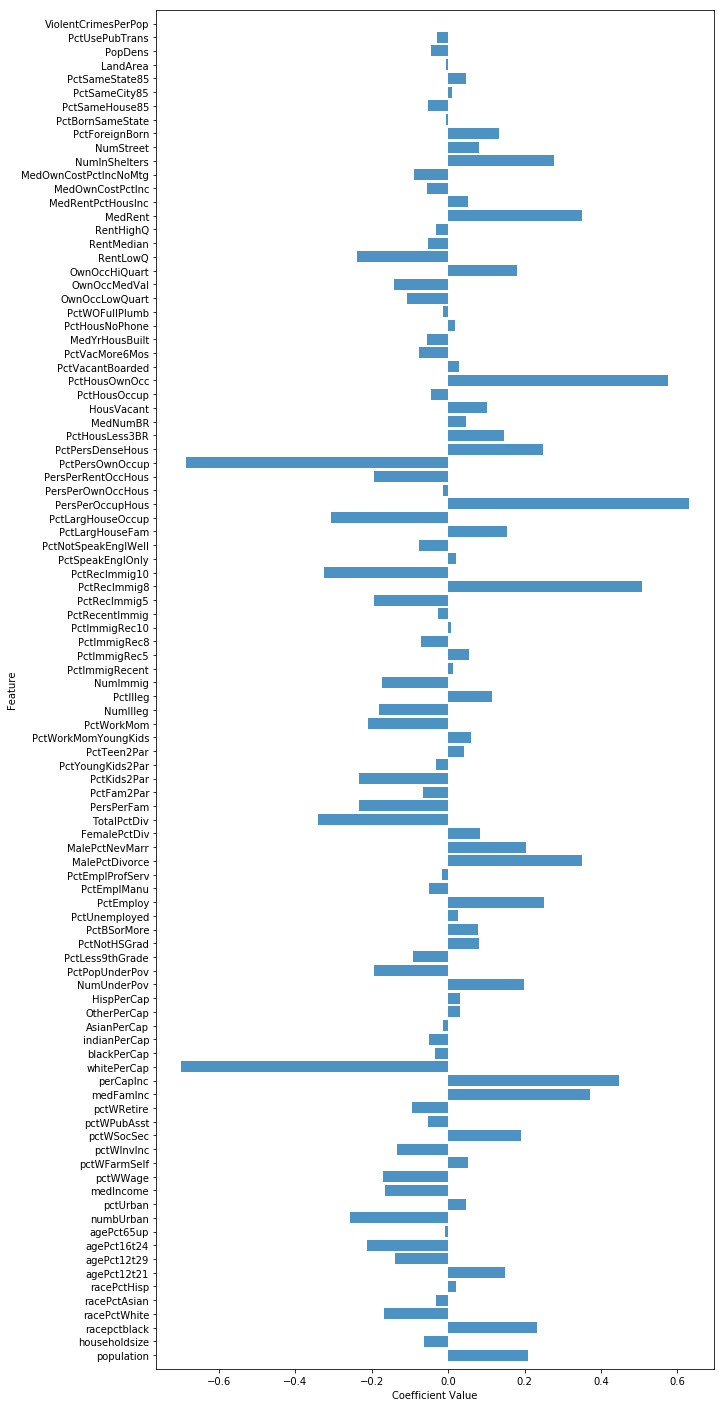

In [999]:
# plot the model coefficients
import pylab as pl
%matplotlib inline
def plot_coefficients(w, n_features, feature_names):
    
    pl.figure(figsize=(10,25))
    pl.barh(range(n_features-1), np.squeeze(np.asarray(w))[:-1], align='center', alpha=0.8)
    #pl.barh(range(n_features-1), model.coef_[:-1], align='center', height=5, alpha=0.8)
    pl.xlabel("Coefficient Value")
    pl.yticks(np.arange(n_features), feature_names)
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(w, len(community_names), community_names)

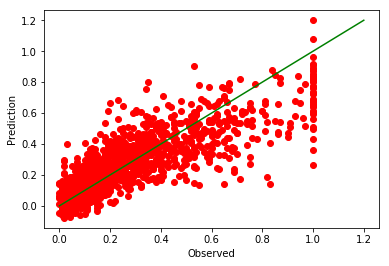

In [1000]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y, yHat, 'ro')
plt.plot([0,1.2],[0,1.2], 'g-')
plt.xlabel('Observed')
plt.ylabel('Prediction')
plt.show()

**Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).**

In [1001]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=99)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        
        w = model(x[train],y[train])
        yHat = x[test]*w
        yHatT = yHat.T
        
        err = abs(yHatT - y[test])
        total_error = np.dot(err,err.T)
        rmse = np.sqrt(total_error/len(yHat))
        
        xval_err += rmse
        f += 1
    return xval_err/n

In [1002]:
rmse_10cv = cross_validate(standRegres, x, y, 10, verbose=True)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on 10-fold CV: 0.1388


In [1003]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1294
RMSE on 10-fold CV: 0.1388


With reference to the figure above, the linear regression model had RMSE of 12.94% for training, while it shows 13.88% for 10 fold X-Validation.

**c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights**

**Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation using only the selected features (See scikit-learn's metrics.neg_mean_absolute_error). In order to use cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.] As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.**

array([0.1108, 0.1004, 0.1004, 0.1007, 0.0977, 0.0976, 0.0966, 0.0964, 0.0964, 0.0966, 0.097 , 0.0979, 0.0984, 0.099 ,
       0.0992, 0.0987, 0.0988, 0.0993, 0.0987, 0.0981])

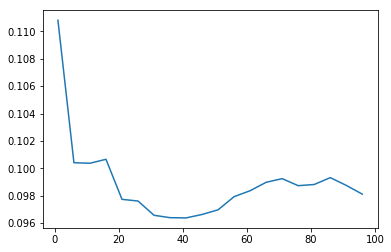

In [1004]:
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error')
    results = np.append(results, abs(scores.mean()))

plt.plot(percentiles, results)
results

In [1005]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print(optimal_percentile_ind)

8


In [1006]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")

Optimal percentile of features:41 



In [1007]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)

In [1008]:
columnsName = community_names
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(list(columnsName))
print(fs.get_support())
print(fs.scores_)

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'Pers

In [1009]:
fs.get_support()
count = 0
for i in range(len(fs.get_support())):
    if fs.get_support()[i]:
        count +=1
print(count)

40


**The list of most informative variables and their weights**

In [1010]:
for i in range(len(columnsName)-1):
    if fs.get_support()[i]:
        print("%10s  %3.2f" % (columnsName[i], fs.scores_[i]))

population  229.12
racepctblack  1123.83
racePctWhite  1488.09
 numbUrban  219.66
 medIncome  349.83
  pctWWage  168.43
pctWInvInc  809.05
pctWPubAsst  779.92
 medFamInc  384.02
 perCapInc  237.07
NumUnderPov  387.72
PctPopUnderPov  588.74
PctLess9thGrade  328.06
PctNotHSGrad  497.50
PctBSorMore  186.18
PctUnemployed  553.50
 PctEmploy  204.47
MalePctDivorce  610.39
FemalePctDiv  724.40
TotalPctDiv  711.19
PctFam2Par  1538.15
PctKids2Par  1852.36
PctYoungKids2Par  1233.31
PctTeen2Par  1155.00
  NumIlleg  454.98
  PctIlleg  1860.92
PctLargHouseFam  279.10
PctPersOwnOccup  564.81
PctPersDenseHous  413.70
PctHousLess3BR  412.95
  MedNumBR  183.92
HousVacant  306.03
PctHousOccup  178.97
PctHousOwnOcc  415.55
PctVacantBoarded  466.44
PctHousNoPhone  524.07
PctWOFullPlumb  243.30
MedRentPctHousInc  168.52
NumInShelters  259.78
 NumStreet  180.98


**As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition**

In [1011]:
linreg.fit(x_train_fs,y_train)
x_test_fs = fs.transform(x_test)
p = linreg.predict(x_test_fs)

err = abs(p-y_test)
total_error = np.dot(err,err)

# Finally compute RMSE
rmse = np.sqrt(total_error/len(p))
print("RMSE: ",rmse)

RMSE:  0.13453488205166494


**d) Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]**

In [1012]:
from sklearn.linear_model import Lasso, Ridge

alphas = np.array(list(range(20)))+1
alphas = alphas*5.0/100
alphas

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ,
       0.95, 1.  ])

**A function for Ridge Regression**

In [1013]:
from sklearn.model_selection import KFold
def ridge_alpha(x_train, y_train, alphas):
    
    a_rmse_train = list()
    a_rmse_cv = list()
    
    count_min = 10000
    index_min = -1
    i = 0
    for alpha in alphas:
        print("alpha", alpha)
        print("Method: Ridge Regression")
        ridge = Ridge(fit_intercept=True, alpha=alpha)
        ridge.fit(x_train,y_train)
        p = ridge.predict(x_train)
        e = abs(p-y_train)
        #e = e[0:len(e),0]
        rmse_train = np.sqrt(np.dot(e,e)/len(p))
        a_rmse_train.append(rmse_train)
        print("RMSE on training:",rmse_train)

        n = 5
        #kf = KFold(len(x_train), n_folds=n)
        kf = KFold(n_splits=n)
    
        total_error = 0
        
        for train,test in kf.split(x_train):
            ridge.fit(x_train[train],y_train[train])
            p = ridge.predict(x_train[test])
            e = p-y_train[test]
            #e = e[0:len(e),0]
            total_error += np.sqrt(np.dot(e,e)/len(x_train[test]))
        total_error = total_error/n
        a_rmse_cv.append(total_error)
        print("RMSE on K Fold:",total_error,"\n")
        
        if total_error < count_min:
            count_min = total_error
            index_min = i
        i += 1
    print("Minimun Error under Index:",index_min)
    print("The optimal alpha parameter:",alphas[index_min])
    return a_rmse_train,a_rmse_cv

a_rmse_train,a_rmse_cv = ridge_alpha(x_train, y_train, alphas)

alpha 0.05
Method: Ridge Regression
RMSE on training: 0.12951902787186623
RMSE on K Fold: 0.13788755429601657 

alpha 0.1
Method: Ridge Regression
RMSE on training: 0.12961800013467353
RMSE on K Fold: 0.13763631565723677 

alpha 0.15
Method: Ridge Regression
RMSE on training: 0.12971498669654058
RMSE on K Fold: 0.13748878441867118 

alpha 0.2
Method: Ridge Regression
RMSE on training: 0.12980683269319196
RMSE on K Fold: 0.13738822441348536 

alpha 0.25
Method: Ridge Regression
RMSE on training: 0.12989343676496487
RMSE on K Fold: 0.13731427049518247 

alpha 0.3
Method: Ridge Regression
RMSE on training: 0.12997525484304984
RMSE on K Fold: 0.13725728179739777 

alpha 0.35
Method: Ridge Regression
RMSE on training: 0.13005281119274884
RMSE on K Fold: 0.13721195768582298 

alpha 0.4
Method: Ridge Regression
RMSE on training: 0.1301265862711362
RMSE on K Fold: 0.13717508925877925 

alpha 0.45
Method: Ridge Regression
RMSE on training: 0.1301969956257074
RMSE on K Fold: 0.13714459638102733 

**Plot the error values on the training and cross-validation splits across the specified values of the alpha parameter.**

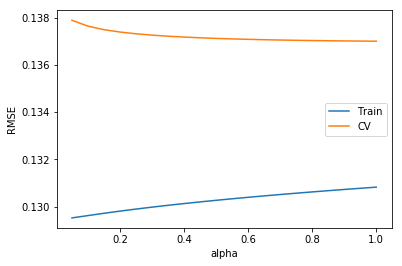

In [1014]:
plt.plot(alphas,a_rmse_train,label="Train")
plt.plot(alphas,a_rmse_cv,label="CV")
plt.legend( ('Train','CV') )
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [1015]:
np.set_printoptions(precision=4,suppress=True)
alphas = np.array(list(range(20)))+1
alphas = alphas*5.0/1000
alphas

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 ,
       0.085, 0.09 , 0.095, 0.1  ])

**A function for Lasso Regression**

In [1016]:
def lasso_alpha(x_train, y_train, alphas):
    a_rmse_train = list()
    a_rmse_cv = list()
    
    count_min = 10000
    index_min = -1
    i = 0
    for alpha in alphas:
        print("alpha", alpha)
        print("Method: Lasso Regression")
        lasso = Lasso(alpha=alpha)
        lasso.fit(x_train,y_train)
        p = lasso.predict(x_train)
        e = abs(p-y_train)
        #e = e[0:len(e),0]
        rmse_train = np.sqrt(np.dot(e,e)/len(p))
        a_rmse_train.append(rmse_train)
        print("RMSE on training:",rmse_train)

        n = 5
        #kf = KFold(len(x_train), n_folds=n)
        kf = KFold(n_splits=n)
        total_error = 0
        
        for train,test in kf.split(x_train):
            lasso.fit(x_train[train],y_train[train])
            p = lasso.predict(x_train[test])
            e = abs(p-y_train[test])
            #e = e[0:len(e),0]
            total_error += np.sqrt(np.dot(e,e)/len(x_train[test]))
        total_error = total_error/n
        a_rmse_cv.append(total_error)
        print("RMSE on K Fold:",total_error,"\n")
        
        if total_error < count_min:
            count_min = total_error
            index_min = i
        i += 1
    print("Minimun Error Under Index:",index_min)
    print("The optimal alpha parameter:",alphas[index_min])
    return a_rmse_train,a_rmse_cv
a_rmse_train,a_rmse_cv = lasso_alpha(x_train, y_train, alphas)

alpha 0.005
Method: Lasso Regression
RMSE on training: 0.14544872931779254
RMSE on K Fold: 0.14559210636913839 

alpha 0.01
Method: Lasso Regression
RMSE on training: 0.15413876594057743
RMSE on K Fold: 0.153956969541727 

alpha 0.015
Method: Lasso Regression
RMSE on training: 0.16378868684501557
RMSE on K Fold: 0.1637011103567923 

alpha 0.02
Method: Lasso Regression
RMSE on training: 0.17641420579284892
RMSE on K Fold: 0.17625248991692513 

alpha 0.025
Method: Lasso Regression
RMSE on training: 0.18953605101220508
RMSE on K Fold: 0.189379147184227 

alpha 0.03
Method: Lasso Regression
RMSE on training: 0.20378517697021944
RMSE on K Fold: 0.20374801790192767 

alpha 0.035
Method: Lasso Regression
RMSE on training: 0.21943551962433577
RMSE on K Fold: 0.21952308095658385 

alpha 0.04
Method: Lasso Regression
RMSE on training: 0.23190349099341695
RMSE on K Fold: 0.23180398527057539 

alpha 0.045
Method: Lasso Regression
RMSE on training: 0.23190349099341695
RMSE on K Fold: 0.231803985270

**Plot the error values on the training and cross-validation splits across the specified values of the alpha parameter.**

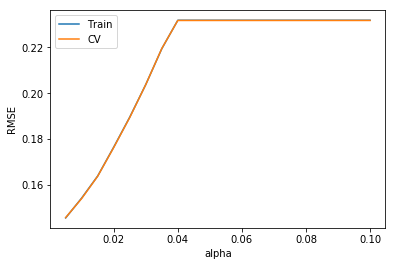

In [1017]:
plt.plot(alphas,a_rmse_train,label="Train")
plt.plot(alphas,a_rmse_cv,label="CV")
plt.legend( ('Train','CV') )
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

**Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data.**

In [1018]:
# Ridge: 1 in index 19
# Lasso: 0.005 in index 0

print("Method: Ridge Regression")
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)
p = ridge.predict(x_test)
e = abs(p-y_test)
#e = e[0:len(e),0]
rmse_test = np.sqrt(np.dot(e,e)/len(p))
a_rmse_train.append(rmse_train)
print("RMSE on testing:",rmse_test)

print("Method: Lasso Regression")
lasso = Lasso(alpha=0.005)
lasso.fit(x_train,y_train)
p = lasso.predict(x_test)
e = abs(p-y_test)
#e = e[0:len(e),0]
rmse_test = np.sqrt(np.dot(e,e)/len(p))
a_rmse_train.append(rmse_train)
print("RMSE on testing:",rmse_test)

Method: Ridge Regression
RMSE on testing: 0.1328525921891906
Method: Lasso Regression
RMSE on testing: 0.14746784404016708


In [1019]:
# For discussion purpose
print("RMSE Linear Reg on training:  0.1294")
print("RMSE Linear Reg on K fold:  0.1388")
print("RMSE Linear Reg on testing:  0.13453488205166494")
print("\n")
print("RMSE Ridge Reg on training: 0.12961800013467353")
print("RMSE Ridge Reg on K Fold: 0.13763631565723677")
print("\n")
print("RMSE Lasso Reg on training: 0.14544872931779254")
print("RMSE Lasso Reg on K Fold: 0.14559210636913839 ")

RMSE Linear Reg on training:  0.1294
RMSE Linear Reg on K fold:  0.1388
RMSE Linear Reg on testing:  0.13453488205166494


RMSE Ridge Reg on training: 0.12961800013467353
RMSE Ridge Reg on K Fold: 0.13763631565723677


RMSE Lasso Reg on training: 0.14544872931779254
RMSE Lasso Reg on K Fold: 0.14559210636913839 


**Discuss your observation and conclusions**

With reference to this experiment, ridge can perform slightly better than lasso regression. The RMSE for the test sets did not differ much from the training set for both regression techniques. Comparing to linear regression, ridge regression performance is not significantly superior and lasso regression performance is not clearly inferior to linear regression. Referring to the theory, lasso regression can zero out the coefficients while ridge does not eliminate the coefficients. Lasso regression might have eleminated the variables that are meant to be kept for the prediction. Because the test results are comparable to the cross validated results, the ridge might be a good technique for this data compared to lasso regression.

**e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing.**

**For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data.**

**Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter.**

**[Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a brief summary of your findings from the above experiments.**

In [1020]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


trainNP = np.array(x_train)
x = np.array([np.concatenate((v,[1])) for v in trainNP])
x_test = np.array([np.concatenate((v,[1])) for v in x_test])

target = community['ViolentCrimesPerPop']

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

In [1021]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

gs = GridSearchCV(SGDRegressor(random_state=33),param_grid={"penalty":['l2', 'l1'], 'alpha' :np.linspace(0.0001, 15, 100)},cv=5)
gs.fit(x_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=33, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbo...
        9.0909,  9.2425,  9.394 ,  9.5455,  9.697 ,  9.8485, 10.    , 10.1515, 10.3031, 10.4546, 10.6061, 10.7576,
       10.9091, 11.0606, 11.2121, 11.3637, 11.5152, 11.6667, 11.8182, 11.9697, 12.1212, 12.2727, 12.4243, 12.5758,
       12.7273, 12.8788, 13.0303, 13.1818, 13.3333, 13.4849, 13.6364, 13.7879, 13.9394, 14.0909,

In [1022]:
gs.best_params_.items()

dict_items([('alpha', 0.0001), ('penalty', 'l1')])

In [1023]:
for (i, j) in gs.best_params_.items():
    #sgdreg.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)
    print("\n")
print('Choose best parameter by Gridsearch : %s' % gs.best_params_ , gs.best_score_)

The optimum value of alpha is estimated as 0.0001


The optimum value of penalty is estimated as l1


Choose best parameter by Gridsearch : {'alpha': 0.0001, 'penalty': 'l1'} 0.630147883834317


In [1024]:
sgdreg = SGDRegressor(alpha=0.0001,penalty='l1',random_state=33)

# Compute RMSE on training data
sgdreg.fit(x_s,y_train)
x_s_test = scaler.transform(x_test)
p = sgdreg.predict(x_s_test)
err = abs(p-y_test)

total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))


print("RMSE:",rmse_test)

RMSE: 0.1395279527077218


In [1025]:
def sgd_elasticnet(x_train, y_train, ratios):
    a_rmse_train = list()
    a_rmse_cv = list()
    
    count_min = 10000
    index_min = -1
    i = 0
    for ratio in ratios:
        print("ratio", ratio)
        sgd = SGDRegressor(penalty='elasticnet',l1_ratio=ratio, random_state=33)

        n = 5
        kf = KFold(n_splits=n)
        total_error = 0
        total_error_train = 0
        
        for train,test in kf.split(x_train):
            sgd.fit(x_train[train],y_train[train])
            
            p_train = sgd.predict(x_train[train])
            e_train = abs(p_train-y_train[train])
            total_error_train += np.sqrt(np.dot(e_train,e_train)/len(x_train[train]))
            
            p = sgd.predict(x_train[test])
            e = abs(p-y_train[test])
            #e = e[0:len(e),0]
            total_error += np.sqrt(np.dot(e,e)/len(x_train[test]))
            
        total_error_train = total_error_train/n
        a_rmse_train.append(total_error_train)
        print("RMSE on train:",total_error_train,"\n")            
        
        total_error = total_error/n
        a_rmse_cv.append(total_error)
        print("RMSE on K Fold:",total_error,"\n")
        
        if total_error < count_min:
            count_min = total_error
            index_min = i
        i += 1
    print("Minimun Error Under Index:",index_min)
    print("Ratio:", ratios[index_min])
    return a_rmse_train,a_rmse_cv

ratio = np.linspace(0,1,20)
a_rmse_train,a_rmse_cv = sgd_elasticnet(x_s, y_train, ratio)


ratio 0.0
RMSE on train: 0.13472232369932563 

RMSE on K Fold: 0.1413641368282545 

ratio 0.05263157894736842
RMSE on train: 0.13469768186196082 

RMSE on K Fold: 0.14133359429093664 

ratio 0.10526315789473684
RMSE on train: 0.13467566265595918 

RMSE on K Fold: 0.14130422560188588 

ratio 0.15789473684210525
RMSE on train: 0.13465686917018155 

RMSE on K Fold: 0.141275967980666 

ratio 0.21052631578947367
RMSE on train: 0.1346390680409592 

RMSE on K Fold: 0.141249191265466 

ratio 0.2631578947368421
RMSE on train: 0.1346215154280352 

RMSE on K Fold: 0.1412236602304488 

ratio 0.3157894736842105
RMSE on train: 0.13460350151691047 

RMSE on K Fold: 0.1411974595726582 

ratio 0.3684210526315789
RMSE on train: 0.1345876994470518 

RMSE on K Fold: 0.1411741118372373 

ratio 0.42105263157894735
RMSE on train: 0.13457049672299876 

RMSE on K Fold: 0.14115020065270617 

ratio 0.47368421052631576
RMSE on train: 0.1345530850367422 

RMSE on K Fold: 0.14112569181440732 

ratio 0.5263157894736

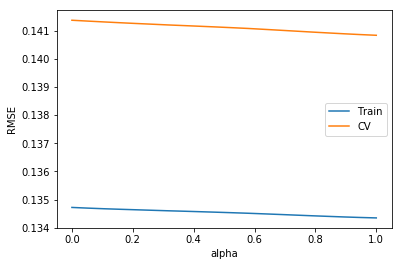

In [1026]:
plt.plot(ratio,a_rmse_train,label="Train")
plt.plot(ratio,a_rmse_cv,label="CV")
plt.legend( ('Train','CV') )
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [1027]:
# Using the best parameters, apply the model to the set-aside test data

sgd = SGDRegressor(penalty='elasticnet',l1_ratio= 1, random_state=33)

sgd.fit(x_s,y_train)
p = sgd.predict(x_s_test)


err = abs(p-y_test)
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print('RMSE on testing: ', rmse_test)

RMSE on testing:  0.1395279527077218


**Provide a summary of your findings from the above experiments.**

Ridge: 0.1329 Lasso: 0.1475 ElasticNet: 0.1395

The experiments iterate through multiple regression techniques for the prediction. The performance of most algorithm fall within the RMSE range of 12% to 15% which is not significantly different from linear regression. The Lasso technique seems to be relatively not an effective technique for this dataset. The Ridge technique seems to be the best according to the lowest RMSE value on the training, cross-validation and testing sets. 

With reference to this experiment, since the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods, and the ratio from this experiment is equal to 1. This means that the result from elastic net tends to depend on L1 penalty which also introduced the same value of RMSE = 0.1395.

### 2) Automatic Document Clustering 

**a) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function**

In [1028]:
def distCosine(vecA, vecB):
        # first find the vector norm
        A_norm = np.linalg.norm(vecA)
        B_norm = np.linalg.norm(vecB)
        # Compute Cosine
        sims = np.dot(vecA,vecB)/(A_norm * B_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
        return dists

**b) Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.**

In [1029]:
# terms as rows and documents as columns
td = pd.read_csv("matrix.txt", header = None)
# transpose
dt = td.T
# dictionary (vocabulary)
terms = pd.read_csv("terms.txt", header = None, dtype = str)
# PREDEFINED CLASSES
classes = pd.read_csv("classes.txt", header = None,sep = ' ',skiprows = 1,index_col = 0)

In [1030]:
print("Doc x Term",dt.shape)
print("dict", terms.shape)
print("class", classes.shape)

Doc x Term (2500, 9328)
dict (9328, 1)
class (2500, 1)


In [1031]:
# convert pandas to numpy
dt_Np = dt.to_numpy()
terms_Np = terms.to_numpy()
classes_Np = classes.to_numpy()

In [1032]:
from sklearn.model_selection import train_test_split
dt_train, dt_test, cl_train, cl_test = train_test_split(dt_Np, classes_Np, test_size=0.2, random_state=99)

In [1033]:
print("dt_train:",dt_train.shape,"dt_test:",dt_test.shape, "cl_train:", cl_train.shape, "cl_test:", cl_test.shape)

dt_train: (2000, 9328) dt_test: (500, 9328) cl_train: (2000, 1) cl_test: (500, 1)


**c) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster.]**

In [1034]:
import kMeans

In [1035]:
centroids, clusterAssment = kMeans.kMeans(dt_train, 5, distCosine, kMeans.randCent)

In [1036]:
cluster_wc = pd.DataFrame()
for c_iter in range(5):
#     c_iter = 0
    docs_in_c = dt_train[clusterAssment[:,0]==c_iter] # document in each cluster
    doc_freq_in_term = (np.array(docs_in_c)!=0).sum(0)
    n_doc = len(docs_in_c)
    print("\nDocs in cluster", c_iter, ":", n_doc)
    
    print(n_doc)
    clusterinfo = pd.DataFrame()
    clusterinfo['term'] = (terms.to_numpy()).ravel()
    clusterinfo['DF'] = doc_freq_in_term
    clusterinfo['%DF'] = (doc_freq_in_term*1.0/n_doc)
    clusterinfo = clusterinfo.sort_values(by='DF',ascending=False)[['term','%DF','DF']]
    print(clusterinfo.head(10))   
    
    temp=clusterinfo[clusterinfo['DF']!=0][['DF','term']]
    temp2 = np.ones((len(temp),1))*c_iter
    temp['cluster'] = temp2
    cluster_wc = cluster_wc.append(temp)


Docs in cluster 0 : 5
5
       term  %DF  DF
443    asqq  1.0   5
2508     ei  1.0   5
3317   gkwt  1.0   5
744     bhj  1.0   5
1420  cliff  1.0   5
5680   nriz  1.0   5
5428    mwt  1.0   5
3385     gp  1.0   5
4835     ma  1.0   5
5426     mw  1.0   5

Docs in cluster 1 : 506
506
          term       %DF   DF
7895   subject  1.000000  506
7115      sale  0.460474  233
2550     email  0.333992  169
6207     pleas  0.326087  165
8174     thank  0.258893  131
5753     offer  0.221344  112
4052  interest  0.201581  102
5795        on  0.195652   99
439        ask  0.195652   99
7406      ship  0.193676   98

Docs in cluster 2 : 1135
1135
         term       %DF    DF
7895  subject  1.000000  1135
9129    write  0.655507   744
417    articl  0.503965   572
5795       on  0.497797   565
4319     just  0.360352   409
8203    think  0.355066   403
4449     know  0.345374   392
3266      get  0.336564   382
6049    peopl  0.319824   363
3339       go  0.315419   358

Docs in cluster 3 : 348

In [1037]:
#conda install -c conda-forge wordcloud

Cluster 0


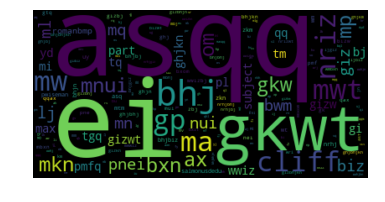

Cluster 1


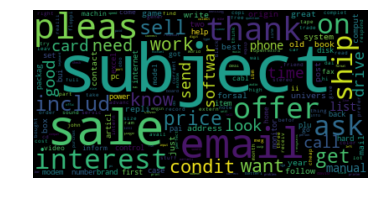

Cluster 2


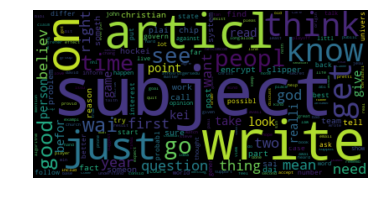

Cluster 3


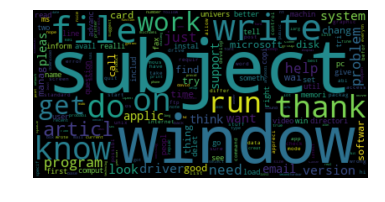

Cluster 4


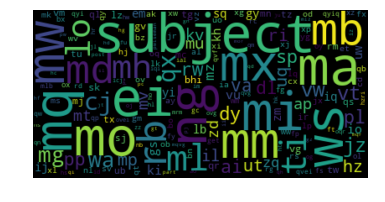

In [1038]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range (5):
    print("Cluster", i)
    word_freq = cluster_wc[cluster_wc['cluster']==i]

    d = {}
    for a, x in word_freq[['term','DF']].values:
        d[a] = int(x)

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**d) Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.**

In [1039]:
from sklearn.metrics import completeness_score, homogeneity_score

print("Completeness_score: ",completeness_score(clusterAssment[:,0],cl_train[:,0]))
print("Homogeneity_score: ", homogeneity_score(clusterAssment[:,0],cl_train[:,0]))

Completeness_score:  0.392169423925709
Homogeneity_score:  0.6274556231679408


In [1040]:
# Homogeneity means all of the observations with the same class label are in the same cluster.
# Completeness means all members of the same class are in the same cluster.

**e) Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.**

In [1041]:
def kMeans_assign(dataSet, k, centroids, distMeas=distCosine):
    m = np.shape(dataSet)[0]
    clusterAssment = np.zeros((m,2))#create mat to assign data points 

    for i in range(m):#for each data point assign it to the closest centroid
        minDist = np.inf; minIndex = -1
        for j in range(k):
            distJI = distMeas(centroids[j,:],dataSet[i,:])
            if distJI < minDist:
                minDist = distJI; minIndex = j
        if clusterAssment[i,0] != minIndex: clusterChanged = True
        clusterAssment[i,:] = minIndex,minDist
    return clusterAssment

test_cluster = kMeans_assign(dt_test,5,centroids)
test_cluster

array([[2.    , 0.646 ],
       [2.    , 0.7716],
       [3.    , 0.7001],
       [2.    , 0.82  ],
       [2.    , 0.6622],
       [2.    , 0.74  ],
       [2.    , 0.6079],
       [2.    , 0.7859],
       [2.    , 0.7784],
       [2.    , 0.6655],
       [2.    , 0.7603],
       [1.    , 0.8782],
       [2.    , 0.6783],
       [2.    , 0.854 ],
       [2.    , 0.7   ],
       [1.    , 0.8353],
       [2.    , 0.8524],
       [2.    , 0.6083],
       [2.    , 0.7564],
       [1.    , 0.7398],
       [1.    , 0.7952],
       [3.    , 0.744 ],
       [2.    , 0.7527],
       [2.    , 0.6949],
       [3.    , 0.6333],
       [2.    , 0.7964],
       [2.    , 0.7099],
       [3.    , 0.6224],
       [1.    , 0.5208],
       [2.    , 0.7754],
       [1.    , 0.7986],
       [1.    , 0.8344],
       [2.    , 0.6664],
       [1.    , 0.7448],
       [2.    , 0.7227],
       [3.    , 0.7081],
       [1.    , 0.8681],
       [2.    , 0.8247],
       [1.    , 0.85  ],
       [1.    , 0.8419],
